# 1. 모듈 임포트및 데이터 살펴보기

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Collecting catboost
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 325.1 kB/s eta 0:05:13
   ---------------------------------------- 0.2/101.7 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.5/101.7 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 0.9/101.7 MB 4.2 MB/s eta 0:00:25
    --------------------------------------- 1.3/101.7 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 1.7/101.7 MB 5.8 MB/s eta 0:00:18
    --------------------------------------- 2.4/101.7 MB 7.1 MB/s eta 0:00:14
   - -------------------------------------- 2.8/101.7 MB 7.1 MB/s eta 0:00:14
   - -------------------------------------- 3.5/101.7 MB 8.2 MB/s eta 0:00:13
   - -------------------------------------- 4.1/101.7 MB 8.7 MB/s eta


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_predict
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


PassengerId   : 승객 아이디 / gggg_pp에서 gggg: 승객그룹식별번호, pp: 그룹내사람식별번호<br>
HomePlanet    : 승객이본래거주하는행성  / 범주형변수(문자열)<br>
CryoSleep     : 항해중승객의동면여부 / True|False<br>
Cabin         : 승객이체류하는객실번호. deck(층수)/num(객실번호)/side(방향) 형태 side->  P: Port, S: Starboard(선박의 좌현/우현)<br>
Destination   : 목적지<br>
Age           : 나이<br>
VIP           : 승객의 VIP 여부 (True|False)<br>
RoomService   : 항해중 손님이 지불한 금액<br>
FoodCourt     : 항해중 손님이 지불한 금액<br>
ShoppingMall  : 항해중 손님이 지불한 금액<br>
SpaVRDeck     : 항해중 손님이 지불한 금액<br>
Name          : 이름 <br>
Transported   : 타깃값edck

# 2. EDA & feature Engineering

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [48]:
print("train set: ", train.shape)
print("test set: ", test.shape)

train set:  (8693, 14)
test set:  (4277, 13)


타깃값의 불균형 문제 확인

In [49]:
train['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [50]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [51]:
train[train.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


### feature engineering(범주형 변수 인코딩 및 boolean형 변환등)

In [52]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin', 'VIP', 'Name']

# 각 범주형 열의 고유 값과 빈도 출력
for col in categorical_cols:
    print(f"--- Column: {col} ---")
    print(train[col].value_counts(dropna=False))
    print("\n")

--- Column: HomePlanet ---
HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64


--- Column: CryoSleep ---
CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64


--- Column: Destination ---
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64


--- Column: Cabin ---
Cabin
NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: count, Length: 6561, dtype: int64


--- Column: VIP ---
VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64


--- Column: Name ---
Name
NaN                   200
Sus Coolez              2
Elaney Webstephrey      2
Dia Cartez              2
Grake Porki             2
                     ... 
Jamela Griffy           1
Hardy Griffy            1
Salley Mckinn           1
Mall Frasp             

Boolean : 정수형 변환  
범주형 변수 : 라벨인코딩 / (Cabin: 각각의 변수에나누어서 저장)   
실수형 변수: 구간 분리, 로그변환

필요없는 열 삭제

In [53]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
print(train.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


In [54]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)
print(train.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


결측치 처리

In [55]:
cat_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'VIP', 'Destination',  'VRDeck']

train = train.dropna()
for col in cat_features :
    test[col] = test[col].fillna(test[col].mode()[0])

num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']
for col in num_features : 
    test[col].fillna(test[col].median(), inplace=True)
print(train.isna().sum())
print(test.isna().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


boolean 속성 처리('CryoSleep', 'VIP', 'Transported') 

In [56]:
train[train.isna().any(axis=1)]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported


In [57]:
bool_cols_train = ['CryoSleep', 'VIP', 'Transported']
for col in bool_cols_train:
    train[col] = train[col].astype(int)

bool_cols_test = ['CryoSleep', 'VIP']
for col in bool_cols_test:
    test[col] = test[col].astype(int)
# 변환 결과 확인
print(train[bool_cols_train].head())
print(test[bool_cols_test].head())

   CryoSleep  VIP  Transported
0          0    0            0
1          0    0            1
2          0    1            0
3          0    0            0
4          0    0            1
   CryoSleep  VIP
0          1    0
1          0    0
2          1    0
3          0    0
4          0    0


Cabin 속성 처리(범주형 변수)  
3개의 항목으로 이루어져있는 변수인 만큼, 3개의 변수로 쪼갠 후  
각각의 변수를 인코딩

In [58]:
# Cabin 정보를 '/'로 분리
cabin_split = train['Cabin'].str.split('/', expand=True)
cabin_split_test = test['Cabin'].str.split('/', expand=True)

# 새로운 열 이름 지정 
cabin_split.columns = ['Deck', 'Num', 'Side']
cabin_split_test.columns = ['Deck', 'Num', 'Side']

# 필요한 열만 선택
train['Deck'] = cabin_split['Deck']
train['Num'] = cabin_split['Num']
train['Side'] = cabin_split['Side']

# 필요한 열만 선택
test['Deck'] = cabin_split_test['Deck']
test['Num'] = cabin_split_test['Num']
test['Side'] = cabin_split_test['Side']

# 'Additional' 열은 필요에 따라 삭제하거나 사용
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)



In [59]:
# 객실 번호를 숫자로 변환,
train['Num'] = pd.to_numeric(train['Num'], errors='coerce')
test['Num'] = pd.to_numeric(test['Num'], errors='coerce')

# Cabin 분리 결과 확인
print(train[['Deck', 'Num', 'Side']].head())
print(test[['Deck', 'Num', 'Side']].head())

  Deck  Num Side
0    B    0    P
1    F    0    S
2    A    0    S
3    A    0    S
4    F    1    S
  Deck  Num Side
0    G    3    S
1    F    4    S
2    C    0    S
3    C    1    S
4    F    5    S


<Axes: >

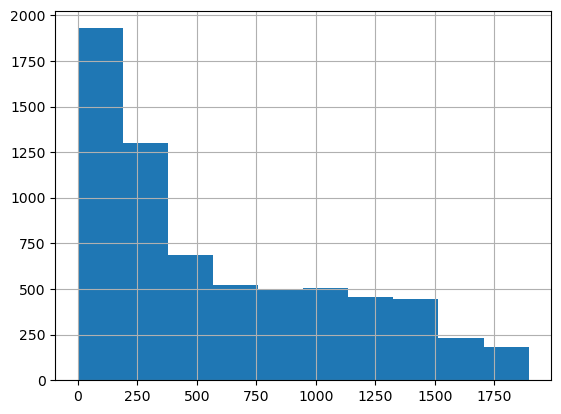

In [60]:
train['Num'].hist()

In [61]:
def cabin_region(df):
    X = pd.DataFrame()
    bins = [-float('inf'), 300, 600, 900, 1200, 1500, 1800, float('inf')]
    labels = [1,2,3,4,5,6,7]
    X['Cabin_region'] = pd.cut(df['Num'], bins=bins, labels=labels, include_lowest=True)
    return X

In [62]:
train['Num'] = np.log(1+train['Num'])

test['Num'] = np.log(1+test['Num'])
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0.000000,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0.000000,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0.000000,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0.000000,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,0.693147,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,4.595120,P
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,7.313220,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,7.313887,S
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,6.411818,S


In [63]:
print(train['Deck'].value_counts())
print(test['Deck'].value_counts())

Deck
F    2208
G    2019
E     700
B     641
C     599
D     381
A     213
T       3
Name: count, dtype: int64
Deck
F    1445
G    1322
E     447
B     362
C     355
D     242
A      98
T       6
Name: count, dtype: int64


In [64]:
deck_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': 8
}

train['Deck'] = train['Deck'].map(deck_mapping)
print(train['Deck'].value_counts())

test['Deck'] = test['Deck'].map(deck_mapping)
print(test['Deck'].value_counts())

Deck
6    2208
7    2019
5     700
2     641
3     599
4     381
1     213
8       3
Name: count, dtype: int64
Deck
6    1445
7    1322
5     447
2     362
3     355
4     242
1      98
8       6
Name: count, dtype: int64


In [65]:
side_mapping = {
    'P': 1,
    'S': 2
}
train['Side'] =  train['Side'].map(side_mapping)
test['Side'] =  test['Side'].map(side_mapping)
print(train)
print(test)

     HomePlanet  CryoSleep    Destination   Age  VIP  RoomService  FoodCourt  \
0        Europa          0    TRAPPIST-1e  39.0    0          0.0        0.0   
1         Earth          0    TRAPPIST-1e  24.0    0        109.0        9.0   
2        Europa          0    TRAPPIST-1e  58.0    1         43.0     3576.0   
3        Europa          0    TRAPPIST-1e  33.0    0          0.0     1283.0   
4         Earth          0    TRAPPIST-1e  16.0    0        303.0       70.0   
...         ...        ...            ...   ...  ...          ...        ...   
8688     Europa          0    55 Cancri e  41.0    1          0.0     6819.0   
8689      Earth          1  PSO J318.5-22  18.0    0          0.0        0.0   
8690      Earth          0    TRAPPIST-1e  26.0    0          0.0        0.0   
8691     Europa          0    55 Cancri e  32.0    0          0.0     1049.0   
8692     Europa          0    TRAPPIST-1e  44.0    0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Tra

HomePlanet, Destination 변수 처리(번주형 변수) -> 라벨 인코딩

In [66]:
#라벨 인코딩 수행
HomePlanet_mapping = {
    'Earth': 1,
    'Europa': 2,
    'Mars':3
}
train['HomePlanet'] = train['HomePlanet'].map(HomePlanet_mapping)
test['HomePlanet'] =  test['HomePlanet'].map(HomePlanet_mapping)

In [67]:
#라벨 인코딩 수행
Destination_mapping = {
    'TRAPPIST-1e': 1,
    '55 Cancri e': 2,
    'PSO J318.5-22':3
}
train['Destination'] = train['Destination'].map(Destination_mapping)
test['Destination'] =  test['Destination'].map(Destination_mapping)

정수형 변수 처리 -> 로그변환이나 구간 나누기  
Age,  RoomService, FoodCourt, ShoppingMall, Spa, VRDeck	


Text(0.5, 0, 'Age (years)')

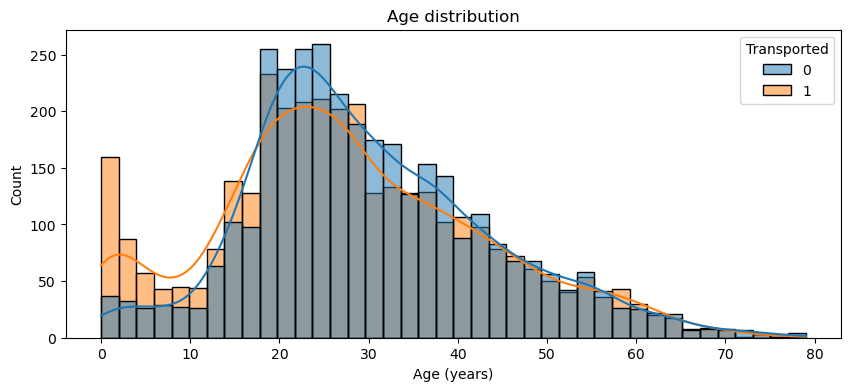

In [68]:
plt.figure(figsize=(10,4))
sns.histplot(x='Age', data=train, hue='Transported', kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

target변수의 분포를 고려하여 age의 그룹핑 기준 정하기(비슷한 분포끼리 묶기)
0-12 : Transported:1 의 비율 매우 높음  
13-17: Transported:1 의 비율 약간 높음  
18-25: Transported:0 의 비율 매우 높음  
26-40: Transported:0 의 비율 약간 높음  
41-55: 서로 비율 비슷함  
56+ : 서로 비율 비슷함

In [69]:
def age_group(df):
    X = pd.DataFrame()
    bins = [-float('inf'), 12, 18, 25, 40, 55, float('inf')]
    labels = [1,2,3,4,5,6]
    X['age-group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
    return X

In [70]:
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')
test['Age'] = pd.to_numeric(test['Age'], errors='coerce')

In [71]:
train['Age'] = np.log(1+train['Age'])
test['Age'] = np.log(1+test['Age'])
train['Age']

0       3.688879
1       3.218876
2       4.077537
3       3.526361
4       2.833213
          ...   
8688    3.737670
8689    2.944439
8690    3.295837
8691    3.496508
8692    3.806662
Name: Age, Length: 6764, dtype: float64

In [72]:
def expenditure(df, feats):
    X = pd.DataFrame()
    X['Expenditure'] =  df[feats].sum(axis=1)
    X['No_spending'] = (df[feats].sum(axis=1) == 0).astype(int)
    return X

In [73]:
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train[['Expenditure', 'No_spending']] = expenditure(train, features)
test[['Expenditure', 'No_spending']] = expenditure(test, features)

train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Expenditure,No_spending
0,2,0,1,3.688879,0,0.0,0.0,0.0,0.0,0.0,0,2,0.000000,1,0.0,1
1,1,0,1,3.218876,0,109.0,9.0,25.0,549.0,44.0,1,6,0.000000,2,736.0,0
2,2,0,1,4.077537,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0.000000,2,10383.0,0
3,2,0,1,3.526361,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0.000000,2,5176.0,0
4,1,0,1,2.833213,0,303.0,70.0,151.0,565.0,2.0,1,6,0.693147,2,1091.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,2,3.737670,1,0.0,6819.0,0.0,1643.0,74.0,0,1,4.595120,1,8536.0,0
8689,1,1,3,2.944439,0,0.0,0.0,0.0,0.0,0.0,0,7,7.313220,2,0.0,1
8690,1,0,1,3.295837,0,0.0,0.0,1872.0,1.0,0.0,1,7,7.313887,2,1873.0,0
8691,2,0,2,3.496508,0,0.0,1049.0,0.0,353.0,3235.0,0,5,6.411818,2,4637.0,0


In [74]:
train['Expenditure'] = np.log(1+train['Expenditure'] )
test['Expenditure'] = np.log(1+test['Expenditure'] )


In [75]:
train.drop(columns=features,  axis=1, inplace=True)
test.drop(columns=features,  axis=1, inplace=True)


In [76]:
train['Expenditure']

0       0.000000
1       6.602588
2       9.248021
3       8.551981
4       6.995766
          ...   
8688    9.052165
8689    0.000000
8690    7.535830
8691    8.442039
8692    8.481980
Name: Expenditure, Length: 6764, dtype: float64

### 간단한 데이터 시각화

In [77]:
print(train.isna().sum())
print(test.isna().sum())

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
Deck           0
Num            0
Side           0
Expenditure    0
No_spending    0
dtype: int64
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Deck           0
Num            0
Side           0
Expenditure    0
No_spending    0
dtype: int64


In [78]:
train.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side,Expenditure,No_spending
count,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000
mean,1.666026,0.351863,1.402425,3.212728,0.024246,0.502809,5.281047,5.841769,1.506357,4.335571,0.413365
std,0.797244,0.477587,0.655576,0.752304,0.153823,0.500029,1.792534,1.269601,0.499997,3.698643,0.492474
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.995732,0.000000,0.000000,4.000000,5.116492,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,3.332205,0.000000,1.000000,6.000000,6.050911,2.000000,6.609349,0.000000
75%,2.000000,1.000000,2.000000,3.663562,0.000000,1.000000,7.000000,6.902743,2.000000,7.323831,1.000000
max,3.000000,1.000000,3.000000,4.382027,1.000000,1.000000,8.000000,7.546974,2.000000,10.490941,1.000000


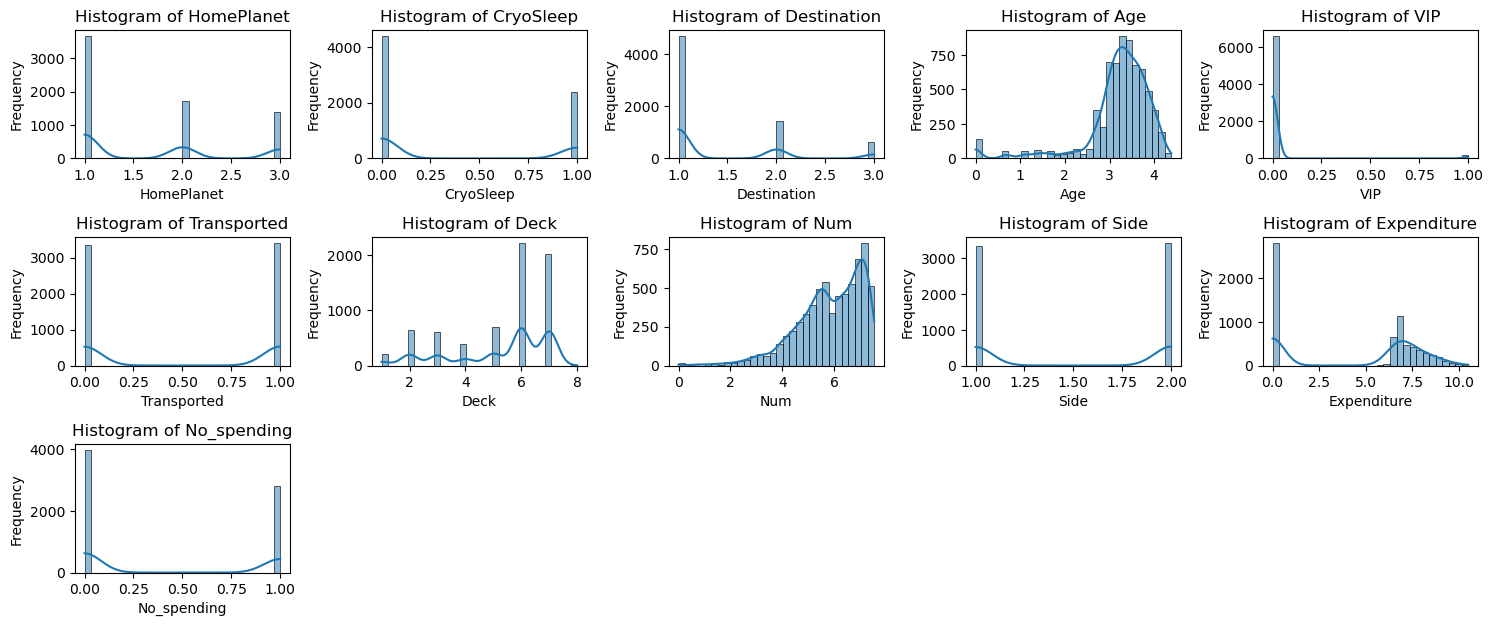

In [79]:
numeric_cols = train.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i + 1)  
    sns.histplot(train[col], bins=30, kde=True)  # 히스토그램 및 커널 밀도 추정
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 3. 데이터 전처리

In [80]:
X_train = train.drop('Transported', axis=1)  # 예측하고자 하는 타겟 변수
y_train = train['Transported']
X_test=test

In [81]:
# 스케일링
#scaler = StandardScaler()
#X_train_sc = scaler.fit_transform(X_train)
#X_test_sc = scaler.transform(X_test)

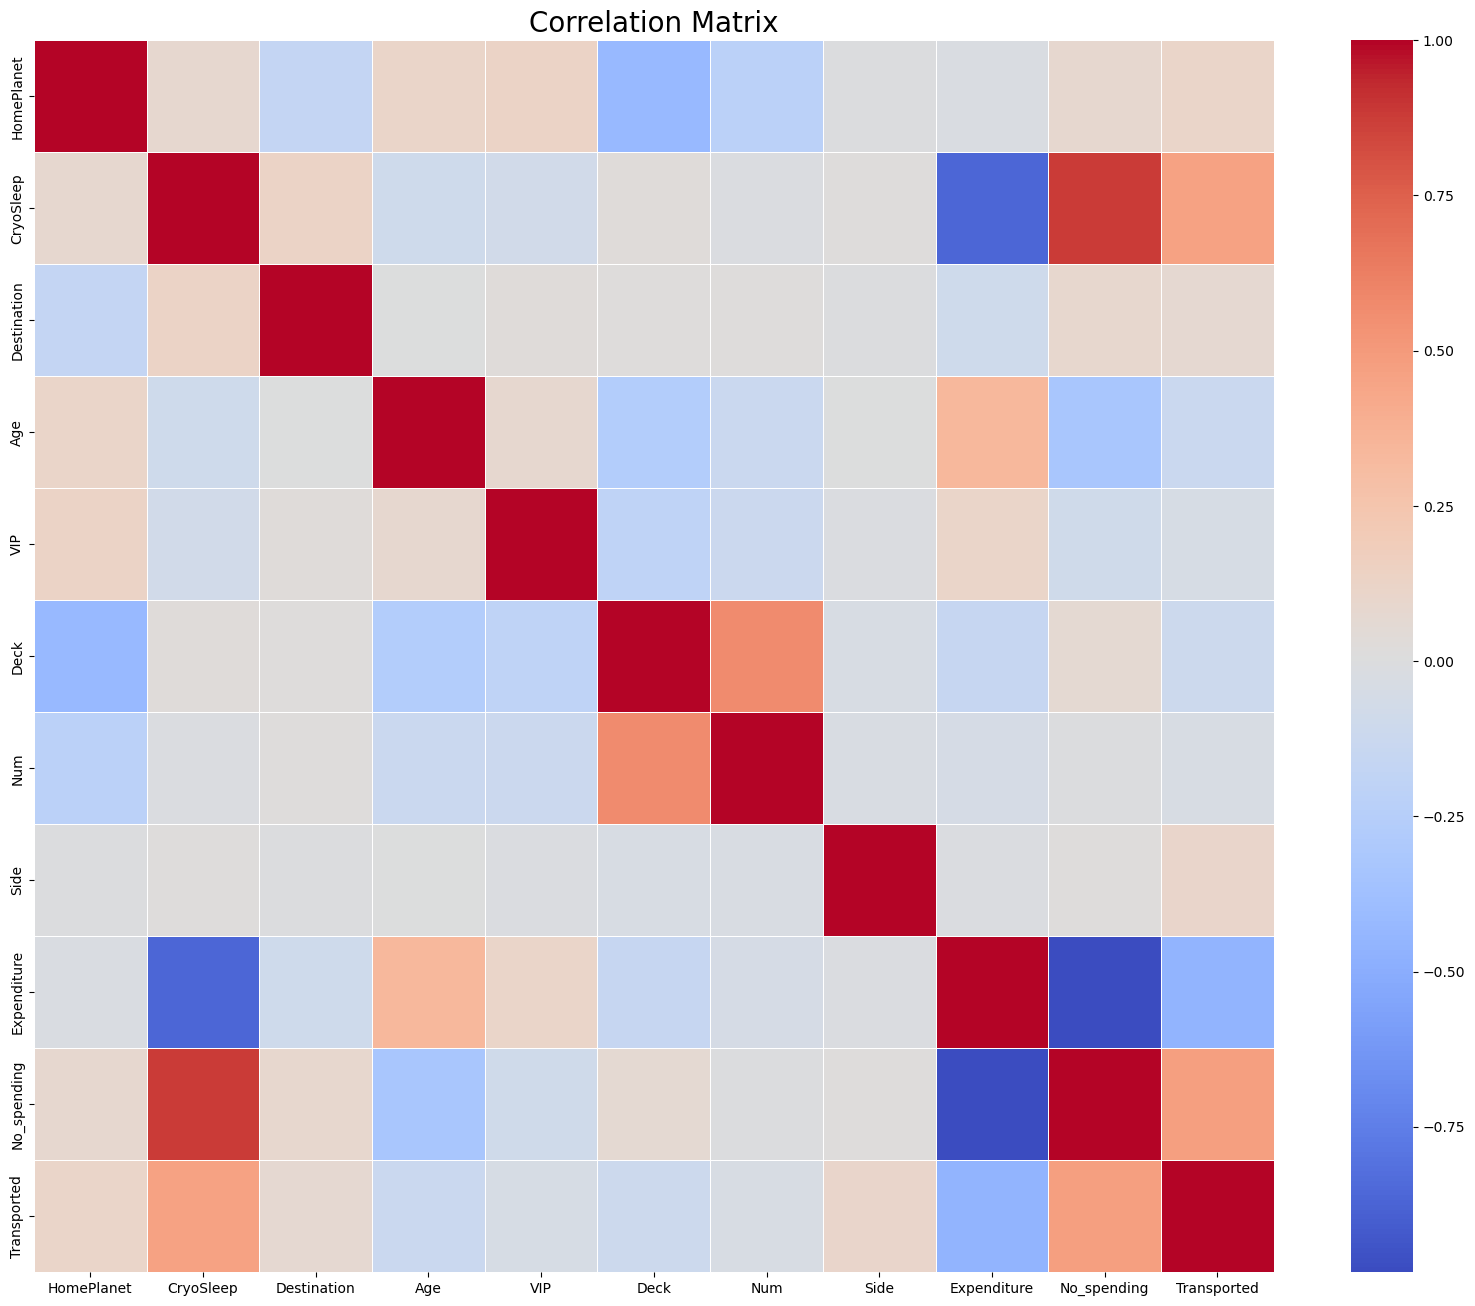

In [82]:
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

correlation_matrix = train_data.corr()

# 히트맵 크기 설정
plt.figure(figsize=(20, 16))

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# 제목 추가
plt.title('Correlation Matrix', fontsize=20)

# 표시
plt.show()

# 타겟 변수와의 상관관계 추출
target_correlations = correlation_matrix['Transported'].drop('Transported')

In [83]:
# 상관관계가 낮은 특징 식별
low_corr_features = target_correlations[abs(target_correlations) < 0.05].index.tolist()
print(f"Removing features with low correlation: {low_corr_features}")

X_train.drop(columns=low_corr_features, inplace=True)
X_test.drop(columns=low_corr_features, inplace=True)
print(X_train)
print(X_test)

Removing features with low correlation: ['VIP', 'Num']
      HomePlanet  CryoSleep  Destination       Age  Deck  Side  Expenditure  \
0              2          0            1  3.688879     2     1     0.000000   
1              1          0            1  3.218876     6     2     6.602588   
2              2          0            1  4.077537     1     2     9.248021   
3              2          0            1  3.526361     1     2     8.551981   
4              1          0            1  2.833213     6     2     6.995766   
...          ...        ...          ...       ...   ...   ...          ...   
8688           2          0            2  3.737670     1     1     9.052165   
8689           1          1            3  2.944439     7     2     0.000000   
8690           1          0            1  3.295837     7     2     7.535830   
8691           2          0            2  3.496508     5     2     8.442039   
8692           2          0            1  3.806662     5     2     8.481980 

In [84]:
# PCA 모델 정의
#pca = PCA(n_components=0.95, random_state=42)  # 95%의 분산을 유지

# PCA 학습 및 변환
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

# 4. 1단계 모델링

In [85]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [86]:
X_test.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
Deck           0
Side           0
Expenditure    0
No_spending    0
dtype: int64

모델링은 2단계로 나누어서 진행  
각각의 단계에는 여러 모델을 혼합하여 스태킹 망식으로 진행  
1단계 : [로지스틱회귀, 랜덤포레스트, LightBoost, CatBoost]  
2단계: [XGBoost, MLP]로 나누어서 두번의 학습 진행

In [87]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    scoring=make_scorer(roc_auc_score),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train, y_train)
print("Logistic Regression Best ROC AUC:", grid_lr.best_score_)

model_lr = grid_lr.best_estimator_ 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression Best ROC AUC: 0.7332658604202035


In [88]:
# Random Forest 하이퍼파라미터 그리드 정의
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=40,  
    scoring=make_scorer(roc_auc_score),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 그리드 서치 수행
random_rf.fit(X_train, y_train)

print("Random Forest Best ROC AUC:", random_rf.best_score_)
model_rf = random_rf.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Random Forest Best ROC AUC: 0.753110011814061


In [89]:
# LightGBM 하이퍼파라미터 그리드 정의
param_dist_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_lgb = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_distributions=param_dist_lgb,
    n_iter=40,  
    scoring=make_scorer(roc_auc_score),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 랜덤 서치 수행
random_lgb.fit(X_train, y_train)
print("LightGBM Best ROC AUC:", random_lgb.best_score_)
model_lgb = random_lgb.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits


  File "C:\Users\j2982\Anaconda 3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\j2982\Anaconda 3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\j2982\Anaconda 3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\j2982\Anaconda 3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 3401, number of negative: 3363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 6764, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502809 -> initscore=0.011236
[LightGBM] [Info] Start training from score 0.011236
LightGBM Best ROC AUC: 0.7524546436600967


In [90]:
param_dist_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 0.5, 1]
}

random_catboost = RandomizedSearchCV(
    estimator= CatBoostClassifier(
    silent=True,
    random_state=42
),
    param_distributions=param_dist_catboost,
    n_iter=40,  # 탐색할 조합의 수
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    verbose=1,
    error_score='raise'  # 에러 발생 시 예외를 던지도록 설정
)
# 그리드 서치 수행
random_catboost.fit(X_train, y_train)

print("CatBoost Best ROC AUC:", random_catboost.best_score_)
model_catboost = random_catboost.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CatBoost Best ROC AUC: 0.8170529882437993


In [91]:
base_models = [model_lr, model_rf, model_lgb, model_catboost]
oof_predictions = np.zeros((X_train.shape[0], len(base_models)))

for idx, model in enumerate(base_models):
    print(f"Training Base Model {idx+1}: {model.__class__.__name__}")
    # cross_val_predict를 사용하여 OOF 예측을 수집합니다.
    
    oof_pred = cross_val_predict(
        model, X_train, y_train, cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        method='predict_proba', n_jobs=-1
    )[:, 1]  # 클래스 1에 대한 확률
    
    oof_predictions[:, idx] = oof_pred
    
    print(f"Base Model {idx+1} OOF ROC AUC: {roc_auc_score(y_train, oof_pred)}\n")

Training Base Model 1: LogisticRegression
Base Model 1 OOF ROC AUC: 0.783995200725889

Training Base Model 2: RandomForestClassifier
Base Model 2 OOF ROC AUC: 0.8082207284891021

Training Base Model 3: LGBMClassifier
Base Model 3 OOF ROC AUC: 0.8112867662455718

Training Base Model 4: CatBoostClassifier
Base Model 4 OOF ROC AUC: 0.8164717431501798



In [92]:
oof_predictions

array([[0.74976247, 0.44139242, 0.47638297, 0.43884732],
       [0.32088286, 0.3355268 , 0.33386381, 0.6016191 ],
       [0.48589695, 0.27416862, 0.29411897, 0.15742425],
       ...,
       [0.22061781, 0.27923104, 0.27087464, 0.29484212],
       [0.3268561 , 0.16862683, 0.24152596, 0.19397115],
       [0.28444091, 0.34222624, 0.3243304 , 0.3199523 ]])

# 5. 2단계 모델링

In [93]:
param_grid_meta1 = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

grid_meta1 = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_meta1,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

grid_meta1.fit(oof_predictions, y_train)
print("Best score for Meta Model 1:", grid_meta1.best_score_)
model_meta1 = grid_meta1.best_estimator_

meta_pred1 = model_meta1.predict_proba(oof_predictions)[:, 1]
print(f"Meta Model 1 ROC AUC: {roc_auc_score(y_train, meta_pred1)}\n")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score for Meta Model 1: 0.8167975976996512
Meta Model 1 ROC AUC: 0.8288893359538215



In [94]:
param_dist_meta2 = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [100, 200, 300],
}

random_meta2 = RandomizedSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_distributions=param_dist_meta2,
    n_iter=40,  # 원하는 조합 수
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)


random_meta2.fit(oof_predictions, y_train)
print("Best score for Meta Model 2:", random_meta2.best_score_)
model_meta2 = random_meta2.best_estimator_

meta_pred2 = model_meta2.predict_proba(oof_predictions)[:, 1]
print(f"Meta Model 2 ROC AUC: {roc_auc_score(y_train, meta_pred2)}\n")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score for Meta Model 2: 0.816394311418413
Meta Model 2 ROC AUC: 0.8169961992777658



In [95]:
# 두 메타 모델의 예측을 평균
final_meta_pred = (meta_pred1 + meta_pred2) / 2

# 최종 ROC AUC 점수
final_auc = roc_auc_score(y_train, final_meta_pred)
print(f"Final Meta Model (Average of Meta Model 1 & 2) ROC AUC: {final_auc}\n")


Final Meta Model (Average of Meta Model 1 & 2) ROC AUC: 0.8223747926022353



# 4.제출

In [96]:
submission = pd.read_csv('data/submission.csv')
submission.head(2)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False


In [97]:
# 테스트 데이터에 대한 기본 모델 예측 수집
test_predictions = np.zeros((X_test.shape[0], len(base_models)))

for idx, model in enumerate(base_models):
    print(f"Retraining Base Model {idx+1}: {model.__class__.__name__} on Full Training Data")
    model.fit(X_train, y_train)  # 전체 훈련 데이터로 재훈련
    
    test_pred = model.predict_proba(X_test)[:, 1]
    test_predictions[:, idx] = test_pred
    
    print(f"Base Model {idx+1} Test Predictions Collected\n")

# 메타 모델 1 예측
meta_test_pred1 = model_meta1.predict_proba(test_predictions)[:, 1]

# 메타 모델 2 예측
meta_test_pred2 = model_meta2.predict_proba(test_predictions)[:, 1]

# 최종 예측 혼합 (평균)
final_meta_test_pred = (meta_test_pred1 + meta_test_pred2) / 2


submission = pd.read_csv('data/submission.csv')
submission['Transported'] = final_meta_test_pred
submission['Transported'] = submission.iloc[:, 1] > 0.5

# 파일 저장
submission.to_csv('spacetitanic_submission.csv', index=False)

Retraining Base Model 1: LogisticRegression on Full Training Data
Base Model 1 Test Predictions Collected

Retraining Base Model 2: RandomForestClassifier on Full Training Data
Base Model 2 Test Predictions Collected

Retraining Base Model 3: LGBMClassifier on Full Training Data
[LightGBM] [Info] Number of positive: 3401, number of negative: 3363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 6764, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502809 -> initscore=0.011236
[LightGBM] [Info] Start training from score 0.011236
Base Model 3 Test Predictions Collected

Retraining Base Model 4: CatBoostClassifier on Full Training Data
Base Model 4 Test Predictions Collected

